In [3]:
import numpy as np
import tensorflow as tf
import csv

AttributeError: module 'numpy.core.multiarray' has no attribute 'einsum'

In [2]:
def make_label(x):
    arr=np.zeros((7))
    if x=='0':
        arr[0]=1
    elif x=='1':
        arr[1]=1
    elif x=='2':
        arr[2]=1
    elif x=='3':
        arr[3]=1
    elif x=='4':
        arr[4]=1
    elif x=='5':
        arr[5]=1
    else:
        arr[6]=1
    
    return arr

In [3]:
def read_data(data):
    label=[]
    image=[]
    type_=[]
    # with open(data,'r') as read:
    #     for line in read:
    #         sam=line.strip().split(' ')
    #         label.append(sam[0])
    #         image.append(np.array(sam[1:-1]))
    #         type.append(sam[-1])
    
    with open(data,'r') as read:
        line=read.readlines()
    sample=csv.reader(line)
    for sam in sample:
        im=[int(i) for i in sam[1].split(' ')]
        label.append(make_label(sam[0]))
        image.append(np.array(im))
        type_.append(sam[-1])
    return label, image, type_

In [4]:
label, image, type_=read_data('fer.csv')

In [5]:
train_image=[]
train_label=[]
test_image=[]
test_label=[]

for i in range(len(type_)):
    if type_[i]=='Training':
        train_image.append(image[i])
        train_label.append(label[i])
    elif type_[i]=='PublicTest':
        test_image.append(image[i])
        test_label.append(label[i])
train_image=np.reshape(train_image,[len(train_image),2304])
train_label=np.reshape(train_label,[len(train_label),7])
test_image=np.reshape(test_image,[len(test_image),2304])
test_label=np.reshape(test_label,[len(test_label),7])

[ 0.  0.  0.  1.  0.  0.  0.]


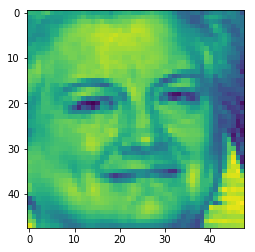

In [25]:
import cv2
import matplotlib.pyplot as plt
im=train_image[100]
im=np.reshape(im,[48,48])
print(train_label[100])
plt.imshow(im)
plt.show()
# cv2.imshow("img",im)
# cv2.waitKey()
# cv2.destroyAllWindows()

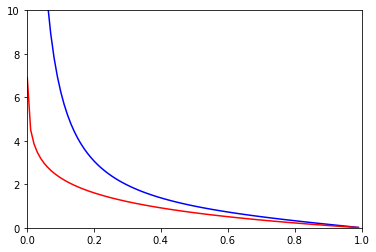

In [26]:
n=1000
x=np.linspace(0.001,0.99,100,endpoint=True)
y=np.tan(-np.pi/2*(x-1))
y1=-np.log(x)
plt.figure()
plt.plot(x,y,color="blue")
plt.plot(x,y1,color="red")
plt.xlim(0,1)
plt.ylim(0,10)

plt.show()


In [29]:
training_epochs=1000
batch_size = 100

tf.reset_default_graph()
x1=tf.placeholder(tf.float32,[None,2304])
y=tf.placeholder(tf.float32, [None,7])

x=tf.reshape(x1,[-1,48,48,1])
keep_prob=tf.placeholder(tf.float32)
learning_rate=tf.placeholder(tf.float32)


In [30]:
print(x)
print(x1)
print(len(train_image))

Tensor("Reshape:0", shape=(?, 48, 48, 1), dtype=float32)
Tensor("Placeholder:0", shape=(?, 2304), dtype=float32)
28709


In [31]:
def make_weight(name,shape):
    return tf.get_variable(name, shape=shape, initializer=tf.contrib.layers.xavier_initializer_conv2d())
def conv(input_, weight):
    return tf.nn.conv2d(input_, weight, strides=[1,1,1,1], padding='SAME')
def max_pool(input_,filter):
    return tf.nn.max_pool(input_, ksize=[1,filter,filter,1], strides=[1,2,2,1], padding='SAME')

In [32]:

#48*48
with tf.variable_scope('layer1') as scope:
    w1_1=make_weight("w1_1",[5,5,1,64])
    b1_1=tf.Variable(tf.random_normal([64]))
    L1_1=tf.nn.relu(conv(x,w1_1)+b1_1)
    
    w1_2=make_weight("w1_2",[5,5,64,64])
    b1_2=tf.Variable(tf.random_normal([64]))
    L1_2=tf.nn.relu(conv(L1_1,w1_2)+b1_2)
    
    L1=tf.nn.dropout(max_pool(L1_2,3),keep_prob=keep_prob)
#24*24    
with tf.variable_scope('layer2') as scope:
    w2_1=make_weight("w2_1", [5,5,64,128])
    b2_1=tf.Variable(tf.random_normal([128]))
    L2_1=tf.nn.relu(conv(L1,w2_1)+b2_1)
    
    w2_2=make_weight("w2_2", [5,5,128,128])
    b2_2=tf.Variable(tf.random_normal([128]))
    L2_2=tf.nn.relu(conv(L2_1,w2_2)+b2_2)
    
#     w2_3=make_weight("w2_3", [5,5,128,128])
#     b2_3=tf.Variable(tf.random_normal([128]))
#     L2_3=tf.nn.relu(conv(L2_2,w2_3)+b2_3)
    
    L2=tf.nn.dropout(max_pool(L2_2,3),keep_prob=keep_prob)
#12*12
with tf.variable_scope('layer3') as scope:
    w3_1=make_weight("w3_1", [3,3,128,256])
    b3_1=tf.Variable(tf.random_normal([256]))
    L3_1=tf.nn.relu(conv(L2,w3_1)+b3_1)
    
    w3_2=make_weight("w3_2", [3,3,256,256])
    b3_2=tf.Variable(tf.random_normal([256]))
    L3_2=tf.nn.relu(conv(L3_1,w3_2)+b3_2)
    
#     w3_3=make_weight("w3_3", [3,3,256,256])
#     b3_3=tf.Variable(tf.random_normal([256]))
#     L3_3=tf.nn.relu(conv(L3_2,w3_3)+b3_3)
    
    L3=tf.nn.dropout(max_pool(L3_2,2),keep_prob=keep_prob)
#6*6
with tf.variable_scope('layer4') as scope:
    w4_1=make_weight("w4_1", [3,3,256,512])
    b4_1=tf.Variable(tf.random_normal([512]))
    L4_1=tf.nn.relu(conv(L3,w4_1)+b4_1)
    
    w4_2=make_weight("w4_2", [3,3,512,512])
    b4_2=tf.Variable(tf.random_normal([512]))
    L4_2=tf.nn.relu(conv(L4_1,w4_2)+b4_2)
    
#     w4_3=make_weight("w4_3", [3,3,512,512])
#     b4_3=tf.Variable(tf.random_normal([512]))
#     L4_3=tf.nn.relu(conv(L4_2,w4_3)+b4_3)
    
    L4=tf.nn.dropout(max_pool(L4_2,2),keep_prob=keep_prob)
    L4_flat=tf.reshape(L4,[-1,3*3*512])
#fullyconnected
with tf.variable_scope('layer5') as scope:
    w5=make_weight("w5",[3*3*512,4096])
    b5=tf.Variable(tf.random_normal([4096]))
    L5=tf.nn.relu(tf.matmul(L4_flat,w5)+b5)
    L5=tf.nn.dropout(L5,keep_prob=keep_prob)
    
with tf.variable_scope('layer6') as scope:
    w6=make_weight("w6",[4096,1024])
    b6=tf.Variable(tf.random_normal([1024]))
    L6=tf.nn.relu(tf.matmul(L5,w6)+b6)
    L6=tf.nn.dropout(L6,keep_prob=keep_prob)
    
with tf.variable_scope('layer7') as scope:
    w7=make_weight("w7",[1024,7])
    b7=tf.Variable(tf.random_normal([7]))
    output=tf.nn.softmax(tf.matmul(L6,w7)+b7)
    
# with tf.variable_scope('layer8') as scope:
#     w8=make_weight("w8",[256,7])
#     b8=tf.Variable(tf.random_normal([7]))
#     output=tf.nn.softmax(tf.matmul(L7,w8)+b8)

In [35]:
cost1=tf.reduce_mean(y*tf.tan(-np.pi/2*(output-1)))
new_y=1-y
cost2=tf.reduce_mean(new_y*tf.tan(np.pi*output/2))

#cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output,labels=y))
optimizer=tf.train.AdagradOptimizer(learning_rate=learning_rate).minimize(cost1+cost2)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(output,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
print("Learning start")
sess=tf.Session()
sess.run(tf.global_variables_initializer())


for epoch in range(training_epochs):
    a=0
    total_batch = int(len(train_image)/batch_size)

    for i in range(total_batch):
        batch_xs=train_image[a:a+batch_size]
        batch_ys=train_label[a:a+batch_size]
        if epoch<100:
            feed_dict={x1:batch_xs, y:batch_ys,keep_prob:0.8,learning_rate:0.0001}
        elif epoch<500:
            feed_dict={x1:batch_xs, y:batch_ys,keep_prob:0.8,learning_rate:0.00001}
        else:
            feed_dict={x1:batch_xs, y:batch_ys,keep_prob:0.8,learning_rate:0.000001}
        acc,c1,c2,label,out,_=sess.run([accuracy,cost1,cost2,y,output,optimizer], feed_dict=feed_dict)
        a=a+batch_size
        
    if epoch %2==0:
        print("epoch : ","%3d"%epoch,"cost : ", "%10f"%c1,"cost : ", "%10f"%c2,"accuracy : ", "%8f"%acc,"output1 : ", "%d"%np.argmax(out[0]),"label : ", "%d"%np.argmax(label[0]))

Learning start
epoch :    0 cost :   14.207207 cost :    0.309243 accuracy :  0.150000 output1 :  1 label :  3
epoch :    2 cost :    7.534496 cost :    0.322094 accuracy :  0.170000 output1 :  3 label :  3
epoch :    4 cost :   12.124663 cost :    0.327556 accuracy :  0.080000 output1 :  6 label :  3
epoch :    6 cost :   12.671375 cost :    0.286094 accuracy :  0.160000 output1 :  6 label :  3
epoch :    8 cost :   12.736086 cost :    0.303306 accuracy :  0.130000 output1 :  3 label :  3
epoch :   10 cost :    6.985946 cost :    0.303701 accuracy :  0.090000 output1 :  2 label :  3
epoch :   12 cost :    5.323626 cost :    0.234572 accuracy :  0.200000 output1 :  0 label :  3
epoch :   14 cost :    5.771681 cost :    0.275563 accuracy :  0.180000 output1 :  2 label :  3
epoch :   16 cost :    5.562901 cost :    0.273808 accuracy :  0.190000 output1 :  3 label :  3
epoch :   18 cost :    7.746361 cost :    0.310198 accuracy :  0.150000 output1 :  3 label :  3
epoch :   20 cost :    6.

In [13]:
cor_pre=tf.equal(tf.arg_max(output,1),tf.arg_max(y,1))
acc_=tf.reduce_mean(tf.cast(cor_pre,tf.float32))
feed_dict={x1:test_image, y:test_label, keep_conv:0.8, keep_hidden:0.5}
test_acc=sess.run(acc_,feed_dict=feed_dict)
print("accuracy : ", test_acc)

accuracy :  0.167456
